# Training Deep Neural Networks

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Vanishing/Exploding Gradients Problem

In [2]:
def sigmoid(z: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-z))

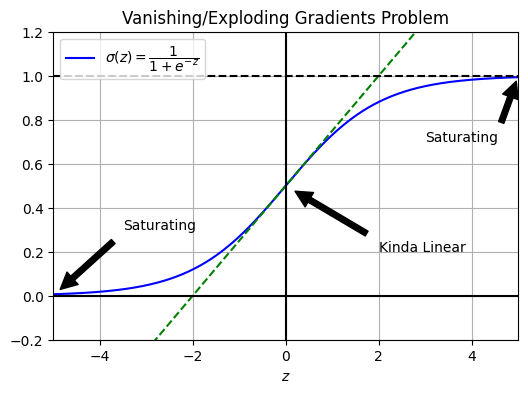

In [3]:
z = np.linspace(-5, 5, 300)
z_activated = sigmoid(z)

plt.figure(figsize= (6, 4))

plt.plot(z, z_activated, 'b-', label= r'$\sigma(z) = \dfrac{1}{1 + e^{-z}}$')
plt.plot([-5, 5], [-0.75, 1.75], 'g--')
plt.hlines([0, 1], -5, 5, colors= 'k', linestyles= ['-', '--'])
plt.vlines(0, -0.2, 1.2, colors= 'k')

props = dict(facecolor='black', shrink=0.1)
plt.annotate(
    text= 'Saturating', 
    xytext= (3, 0.7), 
    xy= (5, 1), 
    arrowprops= props
)
plt.annotate(
    text= 'Saturating', 
    xytext= (-3.5, 0.3), 
    xy= (-5, 0), 
    arrowprops= props
)
plt.annotate(
    text= 'Kinda Linear', 
    xytext= (2, 0.2), 
    xy= (0, 0.5), 
    arrowprops= props
)

plt.title('Vanishing/Exploding Gradients Problem')
plt.xlabel('$z$')
plt.grid()
plt.axis([-5, 5, -0.2, 1.2])
plt.legend(loc= 'upper left')
plt.show()

## Xavier and He Initialization

In [4]:
dense = tf.keras.layers.Dense(50, activation= 'relu', kernel_initializer= 'he_normal')

In [5]:
he_avg_init = tf.keras.initializers.VarianceScaling(scale= 2, mode= 'fan_avg', distribution= 'uniform')
dense = tf.keras.layers.Dense(50, activation= 'relu', kernel_initializer= he_avg_init)

## Leaky ReLU

In [6]:
def leaky_relu(z: np.ndarray, alpha: float = 0.3) -> np.ndarray:
    return np.maximum(alpha * z, z)

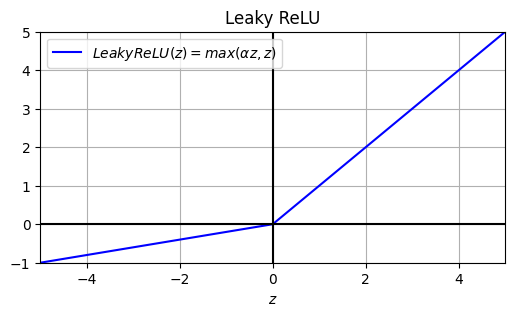

In [7]:
z_activated = leaky_relu(z, alpha= 0.2)

plt.figure(figsize= (6, 3))

plt.plot(z, z_activated, 'b-', label= r'$LeakyReLU(z) = max(\alpha z, z)$')
plt.hlines(0, -5, 5, colors= 'k')
plt.vlines(0, -1, 5, colors= 'k')


plt.title('Leaky ReLU')
plt.xlabel('$z$')
plt.grid()
plt.axis([-5, 5, -1, 5])
plt.legend(loc= 'upper left')
plt.show()

In [8]:
leaky_relu = tf.keras.layers.LeakyReLU(negative_slope= 0.2)    # default 0.3   # alpha= 0.3 is deprecated
dense = tf.keras.layers.Dense(50, activation= leaky_relu, kernel_initializer= 'he_normal')

In [9]:
# can also use this as another layer 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, kernel_initializer= 'he_normal'),
    tf.keras.layers.LeakyReLU(negative_slope= 0.2)
])

## ELU and SELU

In [10]:
dense = tf.keras.layers.Dense(50, activation= 'selu', kernel_initializer= 'lecun_normal')
dense = tf.keras.layers.Dense(50, activation= 'elu', kernel_initializer= 'he_normal')

In [11]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape= (28, 28)),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Flatten()
])
for _ in range(100):
    model.add(tf.keras.layers.Dense(100, activation= 'selu', kernel_initializer= 'lecun_normal'))

model.add(tf.keras.layers.Dense(10, activation= 'softmax'))

In [12]:
model.compile(
    optimizer= tf.keras.optimizers.SGD(learning_rate= 0.001),
    metrics= ['accuracy'],
    loss= 'sparse_categorical_crossentropy'
)

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = fashion_mnist

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
model.layers[0].adapt(X_train)

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
history = model.fit(
    X_train, 
    y_train,
    epochs= 10,
    validation_split= 0.1
)

Epoch 1/10


I0000 00:00:1734513153.757632      90 service.cc:145] XLA service 0x7d73ac004660 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734513153.757699      90 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  27/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1132 - loss: 2.8742  

I0000 00:00:1734513155.939252      90 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.4616 - loss: 1.4553 - val_accuracy: 0.7345 - val_loss: 0.7634
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7408 - loss: 0.7226 - val_accuracy: 0.7845 - val_loss: 0.6040
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7805 - loss: 0.6010 - val_accuracy: 0.7807 - val_loss: 0.6089
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8028 - loss: 0.5487 - val_accuracy: 0.8098 - val_loss: 0.5443
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8252 - loss: 0.5000 - val_accuracy: 0.8308 - val_loss: 0.4791
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8364 - loss: 0.4706 - val_accuracy: 0.8397 - val_loss: 0.4582
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8473 - loss: 0.4420 - val_accuracy: 0.8413 - val_loss: 0.4520
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8226 - loss: 0.5305 - val

In [17]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape= (28, 28)),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Flatten()
])
for _ in range(100):
    model2.add(tf.keras.layers.Dense(100, activation= 'relu', kernel_initializer= 'he_normal'))

model2.add(tf.keras.layers.Dense(10, activation= 'softmax'))

In [18]:
model2.compile(
    optimizer= tf.keras.optimizers.SGD(learning_rate= 0.001),
    metrics= ['accuracy'],
    loss= 'sparse_categorical_crossentropy'
)

In [19]:
model2.layers[0].adapt(X_train)

In [20]:
history = model2.fit(
    X_train, 
    y_train,
    epochs= 10,
    validation_split= 0.1
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.2028 - loss: 2.0338 - val_accuracy: 0.2363 - val_loss: 1.6979
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4698 - loss: 1.2676 - val_accuracy: 0.5825 - val_loss: 1.0301
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6194 - loss: 0.9587 - val_accuracy: 0.3920 - val_loss: 2.5214
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6649 - loss: 0.8969 - val_accuracy: 0.5952 - val_loss: 1.0085
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6407 - loss: 0.9381 - val_accuracy: 0.7283 - val_loss: 0.7681
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6771 - loss: 0.8456 - val_accuracy: 0.6178 - val_loss: 0.9266
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7005 - loss: 0.7960 - val_accuracy: 0.7597 - val_loss: 0.6846
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7444 - loss: 0

ReLU suffered from vanishing gradient problem but SELU converged better on this DNN.

## GELU, Swish and Mish

In [21]:
def swish(z: np.ndarray) -> np.ndarray:
    return z * sigmoid(z)

def parameterized_swish(z: np.ndarray, beta: float = 0.6) -> np.ndarray:
    return z * sigmoid(z * beta)

def gelu(z: np.ndarray) -> np.ndarray:
    return parameterized_swish(z, beta= 1.702)

def softplus(x: np.ndarray) -> np.ndarray:
    return np.log1p(np.exp(x))

def mish(z: np.ndarray) -> np.ndarray:
    return z * np.tanh(softplus(z))

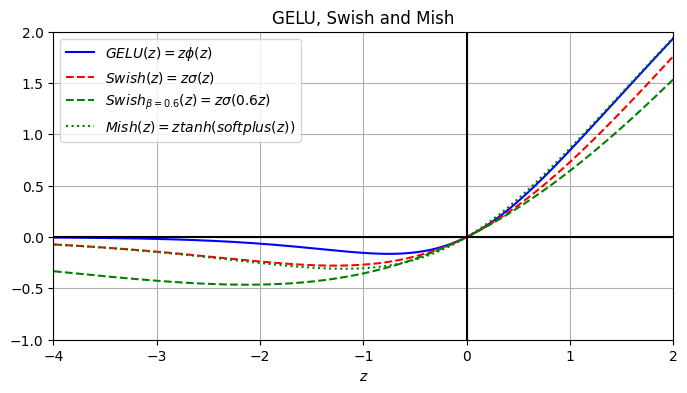

In [22]:
plt.figure(figsize= (8, 4))

plt.plot(z, gelu(z), 'b-', label= r'$GELU(z) = z \phi(z)$')
plt.plot(z, swish(z), 'r--', label= r'$Swish(z) = z \sigma (z)$')
plt.plot(z, parameterized_swish(z), 'g--', label= r'$Swish_{\beta=0.6}(z) = z \sigma (0.6z)$')
plt.plot(z, mish(z), 'g:', label= r'$Mish(z) = ztanh(softplus(z))$')

plt.hlines(0, -4, 2, colors= 'k')
plt.vlines(0, -1, 2, colors= 'k')

plt.title('GELU, Swish and Mish')
plt.xlabel('$z$')
plt.grid()
plt.axis([-4, 2, -1, 2])
plt.legend(loc= 'upper left')
plt.show()

## Batch Normalization

In [23]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape= (28, 28)),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation= 'relu', kernel_initializer= 'he_normal'),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation= 'relu', kernel_initializer= 'he_normal'),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation= 'softmax')
])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [26]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [27]:
model.compile(
    optimizer= 'sgd',
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

In [28]:
history = model.fit(X_train, y_train, epochs= 5, validation_split= 0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7462 - loss: 0.7264 - val_accuracy: 0.8557 - val_loss: 0.4081
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8528 - loss: 0.4107 - val_accuracy: 0.8660 - val_loss: 0.3794
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8741 - loss: 0.3544 - val_accuracy: 0.8725 - val_loss: 0.3692
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8879 - loss: 0.3160 - val_accuracy: 0.8768 - val_loss: 0.3660
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8991 - loss: 0.2844 - val_accuracy: 0.8777 - val_loss: 0.3655


In [29]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape= [28, 28]),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(300, kernel_initializer= 'he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(100, kernel_initializer= 'he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('softmax'),
])

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 268,250 (1.02 MB)

 Trainable params: 267,430 (1.02 MB)

 Non-trainable params: 820 (3.20 KB)

In [32]:
model.compile(
    optimizer= 'sgd',
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

In [33]:
history = model.fit(X_train, y_train, epochs= 5, validation_split= 0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7159 - loss: 0.9793 - val_accuracy: 0.8493 - val_loss: 0.4724
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8289 - loss: 0.5511 - val_accuracy: 0.8625 - val_loss: 0.3988
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8496 - loss: 0.4644 - val_accuracy: 0.8710 - val_loss: 0.3704
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8659 - loss: 0.4114 - val_accuracy: 0.8782 - val_loss: 0.3546
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8776 - loss: 0.3713 - val_accuracy: 0.8780 - val_loss: 0.3477


## Gradient Clipping

In [34]:
optimizer = tf.keras.optimizers.SGD(clipvalue= 1.0)
optimizer = tf.keras.optimizers.SGD(clipnorm= 1.0)

## Faster Optimizers

In [35]:
def build_model(seed: int = 42) -> tf.keras.Model:
    tf.random.set_seed(seed)
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape= [28, 28]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation= 'relu', kernel_initializer= 'he_normal'),
        tf.keras.layers.Dense(100, activation= 'relu', kernel_initializer= 'he_normal'),
        tf.keras.layers.Dense(100, activation= 'relu', kernel_initializer= 'he_normal'),
        tf.keras.layers.Dense(10, activation= 'softmax')
    ])
    return model


def build_and_train_model(optimizer: str | tf.keras.Optimizer) -> tf.keras.callbacks.History:
    model = build_model()
    model.compile(
        optimizer= optimizer,
        loss= 'sparse_categorical_crossentropy',
        metrics= ['accuracy']
    )
    return model.fit(X_train, y_train, epochs= 10, validation_split= 0.1)

### Momentum

In [3]:
mean = X_train.mean(axis= 0, keepdims= True)
std = X_train.std(axis= 0, keepdims= True)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [37]:
optimizer = tf.keras.optimizers.SGD(learning_rate= 0.001, momentum= 0.9)
history_momentum = build_and_train_model(optimizer)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7331 - loss: 0.7773 - val_accuracy: 0.8482 - val_loss: 0.4094
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8580 - loss: 0.3915 - val_accuracy: 0.8632 - val_loss: 0.3723
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8755 - loss: 0.3424 - val_accuracy: 0.8712 - val_loss: 0.3567
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8851 - loss: 0.3126 - val_accuracy: 0.8738 - val_loss: 0.3486
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8936 - loss: 0.2907 - val_accuracy: 0.8748 - val_loss: 0.3434
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9005 - loss: 0.2728 - val_accuracy: 0.8777 - val_loss: 0.3414
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9075 - loss: 0.2572 - val_accuracy: 0.8785 - val_loss: 0.3396
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9130 - loss: 0.2434 - 

### Nesterov Accelerated Gradient

In [38]:
optimizer = tf.keras.optimizers.SGD(learning_rate= 0.001, momentum= 0.9, nesterov= True)
history_nag = build_and_train_model(optimizer)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7327 - loss: 0.7800 - val_accuracy: 0.8495 - val_loss: 0.4158
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8574 - loss: 0.3896 - val_accuracy: 0.8592 - val_loss: 0.3778
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8769 - loss: 0.3416 - val_accuracy: 0.8698 - val_loss: 0.3612
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8861 - loss: 0.3122 - val_accuracy: 0.8722 - val_loss: 0.3512
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8935 - loss: 0.2902 - val_accuracy: 0.8745 - val_loss: 0.3450
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9008 - loss: 0.2717 - val_accuracy: 0.8775 - val_loss: 0.3415
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9073 - loss: 0.2563 - val_accuracy: 0.8785 - val_loss: 0.3401
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9126 - loss: 0.2427 - 

### AdaGrad

In [39]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate= 0.001)
history_ada = build_and_train_model(optimizer)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6346 - loss: 1.1376 - val_accuracy: 0.7973 - val_loss: 0.5710
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8058 - loss: 0.5517 - val_accuracy: 0.8187 - val_loss: 0.4988
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8270 - loss: 0.4878 - val_accuracy: 0.8297 - val_loss: 0.4676
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8384 - loss: 0.4549 - val_accuracy: 0.8358 - val_loss: 0.4486
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8459 - loss: 0.4335 - val_accuracy: 0.8383 - val_loss: 0.4352
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8511 - loss: 0.4178 - val_accuracy: 0.8420 - val_loss: 0.4252
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8559 - loss: 0.4055 - val_accuracy: 0.8445 - val_loss: 0.4174
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8590 - loss: 0.3955 - 

### RMSProp

In [40]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate= 0.001, rho= 0.9)
history_rms = build_and_train_model(optimizer)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7964 - loss: 0.5785 - val_accuracy: 0.8543 - val_loss: 0.4053
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8659 - loss: 0.3812 - val_accuracy: 0.8602 - val_loss: 0.4064
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8775 - loss: 0.3470 - val_accuracy: 0.8687 - val_loss: 0.4188
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8863 - loss: 0.3298 - val_accuracy: 0.8737 - val_loss: 0.4211
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8896 - loss: 0.3197 - val_accuracy: 0.8745 - val_loss: 0.4323
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8910 - loss: 0.3156 - val_accuracy: 0.8727 - val_loss: 0.4653
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8900 - loss: 0.3154 - val_accuracy: 0.8692 - val_loss: 0.5122
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8954 - loss: 0.3146 - 

### Adam

In [41]:
optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001, beta_1= 0.9, beta_2= 0.999)
history_adam = build_and_train_model(optimizer)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7916 - loss: 0.5874 - val_accuracy: 0.8595 - val_loss: 0.3779
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8721 - loss: 0.3510 - val_accuracy: 0.8728 - val_loss: 0.3584
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8855 - loss: 0.3104 - val_accuracy: 0.8735 - val_loss: 0.3591
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8981 - loss: 0.2766 - val_accuracy: 0.8762 - val_loss: 0.3656
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9041 - loss: 0.2584 - val_accuracy: 0.8768 - val_loss: 0.3607
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9125 - loss: 0.2379 - val_accuracy: 0.8780 - val_loss: 0.3713
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9153 - loss: 0.2222 - val_accuracy: 0.8807 - val_loss: 0.3877
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9222 - loss: 0.2077 - 

#### AdaMax

In [42]:
optimizer = tf.keras.optimizers.Adamax(learning_rate= 0.001, beta_1= 0.9, beta_2= 0.999)
history_adamax = build_and_train_model(optimizer)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7851 - loss: 0.6120 - val_accuracy: 0.8647 - val_loss: 0.3772
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8706 - loss: 0.3518 - val_accuracy: 0.8742 - val_loss: 0.3503
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8886 - loss: 0.3044 - val_accuracy: 0.8758 - val_loss: 0.3396
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9009 - loss: 0.2746 - val_accuracy: 0.8773 - val_loss: 0.3372
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9098 - loss: 0.2512 - val_accuracy: 0.8783 - val_loss: 0.3356
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9174 - loss: 0.2312 - val_accuracy: 0.8802 - val_loss: 0.3361
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9234 - loss: 0.2136 - val_accuracy: 0.8808 - val_loss: 0.3411
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9302 - loss: 0.1980 - 

#### Nadam

In [43]:
optimizer = tf.keras.optimizers.Nadam(learning_rate= 0.001, beta_1= 0.9, beta_2= 0.999)
history_nadam = build_and_train_model(optimizer)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8035 - loss: 0.5573 - val_accuracy: 0.8600 - val_loss: 0.3733
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8701 - loss: 0.3480 - val_accuracy: 0.8657 - val_loss: 0.3684
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8882 - loss: 0.3053 - val_accuracy: 0.8753 - val_loss: 0.3532
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8958 - loss: 0.2768 - val_accuracy: 0.8788 - val_loss: 0.3390
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9062 - loss: 0.2518 - val_accuracy: 0.8805 - val_loss: 0.3562
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9136 - loss: 0.2311 - val_accuracy: 0.8790 - val_loss: 0.3685
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9200 - loss: 0.2131 - val_accuracy: 0.8842 - val_loss: 0.3778
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9261 - loss: 0.2006 - 

#### AdamW

In [44]:
optimizer = tf.keras.optimizers.AdamW(weight_decay= 1e-5, learning_rate= 0.001, beta_1= 0.9, beta_2= 0.999)
history_adamw = build_and_train_model(optimizer)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7963 - loss: 0.5782 - val_accuracy: 0.8612 - val_loss: 0.3851
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8702 - loss: 0.3577 - val_accuracy: 0.8655 - val_loss: 0.3744
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8843 - loss: 0.3149 - val_accuracy: 0.8730 - val_loss: 0.3521
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8960 - loss: 0.2790 - val_accuracy: 0.8780 - val_loss: 0.3567
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9032 - loss: 0.2597 - val_accuracy: 0.8823 - val_loss: 0.3418
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9107 - loss: 0.2396 - val_accuracy: 0.8820 - val_loss: 0.3602
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9161 - loss: 0.2249 - val_accuracy: 0.8830 - val_loss: 0.3634
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9223 - loss: 0.2112 - 

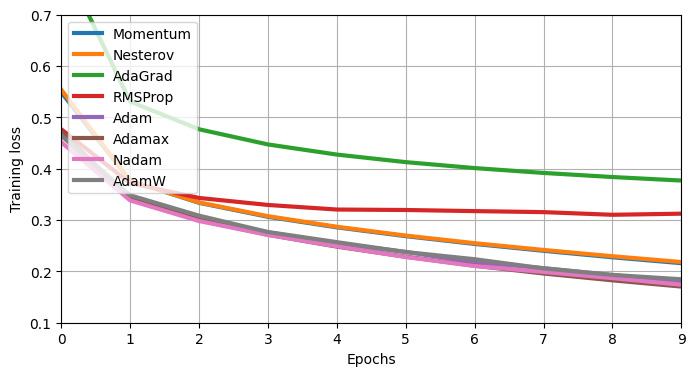

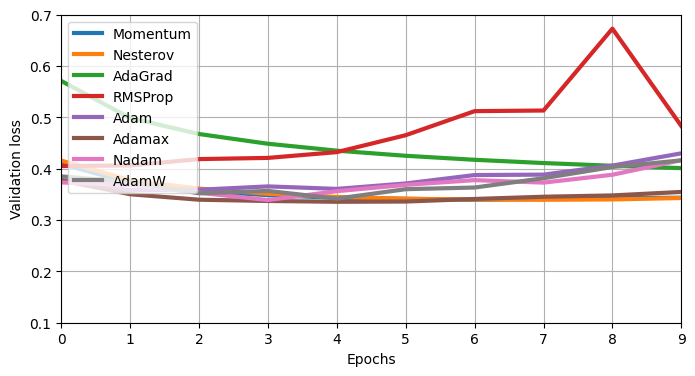

In [45]:
for loss in ('loss', 'val_loss'):
    plt.figure(figsize= (8, 4))
    
    names = 'Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam AdamW'.split()
    histories = [history_momentum, history_nag, history_ada, history_rms, 
                 history_adam, history_adamax, history_nadam, history_adamw]

    for history, name in zip(histories, names):
        plt.plot(history.history[loss], label= name, linewidth= 3)

    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel({'loss': 'Training loss', 'val_loss': 'Validation loss'}[loss])
    plt.legend(loc= 'upper left')
    plt.axis([0, 9, 0.1, 0.7])
    plt.show()

## Learning Rate Scheduling

### Power Scheduling

In [46]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate= 0.01,
    decay_steps= 10_000,
    decay_rate= 1.0,
    staircase= False
)
optimizer = tf.keras.optimizers.SGD(learning_rate= lr_schedule)

In [47]:
history_power_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7381 - loss: 0.7410 - val_accuracy: 0.8467 - val_loss: 0.4186
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8589 - loss: 0.3928 - val_accuracy: 0.8648 - val_loss: 0.3814
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8761 - loss: 0.3442 - val_accuracy: 0.8697 - val_loss: 0.3654
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8851 - loss: 0.3164 - val_accuracy: 0.8740 - val_loss: 0.3557
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8927 - loss: 0.2972 - val_accuracy: 0.8762 - val_loss: 0.3498
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8985 - loss: 0.2823 - val_accuracy: 0.8792 - val_loss: 0.3454
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9028 - loss: 0.2702 - val_accuracy: 0.8800 - val_loss: 0.3425
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9063 - loss: 0.2599 - 

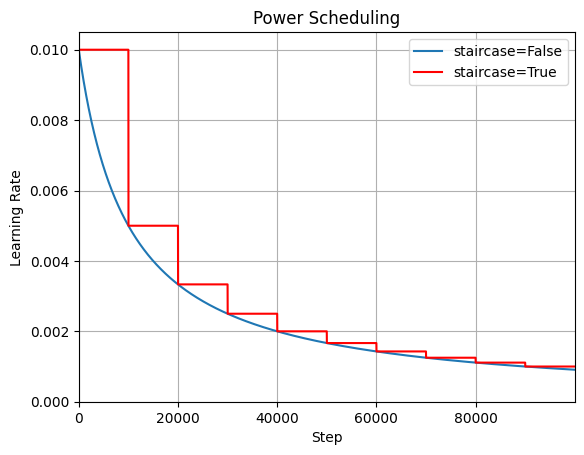

In [48]:
initial_learning_rate = 0.01
decay_rate = 1.0
decay_steps = 10_000

steps = np.arange(100_000)
lrs = initial_learning_rate / (1 + decay_rate * steps / decay_steps)
lrs2 = initial_learning_rate / (1 + decay_rate * np.floor(steps / decay_steps))

plt.plot(steps, lrs, label= 'staircase=False')
plt.plot(steps, lrs2, 'r-', label= 'staircase=True')

plt.title('Power Scheduling')
plt.xlabel('Step')
plt.ylabel('Learning Rate')
plt.axis([0, steps.max(), 0, 0.0105])
plt.legend()
plt.grid(True)
plt.show()

### Exponential Scheduling

In [49]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate= 0.01,
    decay_rate= 0.1,
    decay_steps= 20_000,
    staircase= False
)
optimizer = tf.keras.optimizers.SGD(learning_rate= lr_schedule)

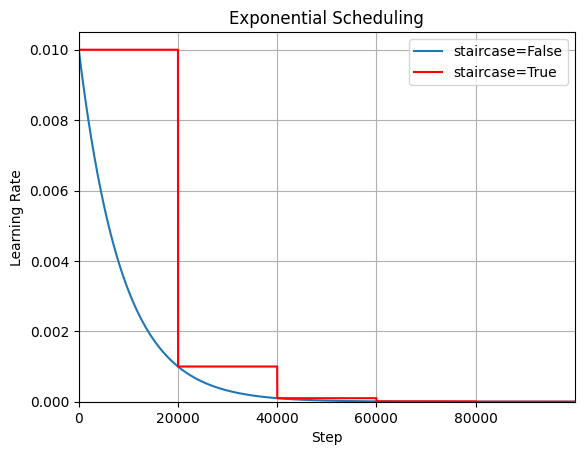

In [50]:
initial_learning_rate = 0.01
decay_rate = 0.1
decay_steps = 20_000

lrs = initial_learning_rate * decay_rate ** (steps / decay_steps)
lrs2 = initial_learning_rate * decay_rate ** np.floor(steps / decay_steps)

plt.plot(steps, lrs, label= 'staircase=False')
plt.plot(steps, lrs2, 'r-', label= 'staircase=True')

plt.title('Exponential Scheduling')
plt.xlabel('Step')
plt.ylabel('Learning Rate')
plt.axis([0, steps.max(), 0, 0.0105])
plt.legend()
plt.grid(True)
plt.show()

In [51]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [52]:
def exponential_decay(epoch: int) -> float:
    return 0.01 * 0.1 ** (epoch / 20)

In [53]:
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate= 0.001)
model.compile(
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy'],
    optimizer= optimizer
)

In [54]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay)

history = model.fit(
    X_train, 
    y_train, 
    epochs= 20, 
    validation_split= 0.05, 
    callbacks= [lr_scheduler]
)

Epoch 1/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7493 - loss: 0.7194 - val_accuracy: 0.8470 - val_loss: 0.4233 - learning_rate: 0.0100
Epoch 2/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8572 - loss: 0.3889 - val_accuracy: 0.8617 - val_loss: 0.3884 - learning_rate: 0.0089
Epoch 3/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8748 - loss: 0.3422 - val_accuracy: 0.8693 - val_loss: 0.3702 - learning_rate: 0.0079
Epoch 4/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8841 - loss: 0.3156 - val_accuracy: 0.8737 - val_loss: 0.3575 - learning_rate: 0.0071
Epoch 5/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8901 - loss: 0.2965 - val_accuracy: 0.8737 - val_loss: 0.3487 - learning_rate: 0.0063
Epoch 6/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8957 - loss: 0.2821 - val_accuracy: 0.8770 - val_loss: 0.3426 - learning_rate: 0.0056
Epoch 7/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8999 - l

In [55]:
# it can also take the current learning rate as argument

def exponential_decay(epoch: int, lr: float):
    return lr * 0.1 ** (1 / 20)

In [56]:
class MyExponentialDecay(tf.keras.callbacks.Callback):
    def __init__(self, n_steps: int) -> None:
        self.n_steps = n_steps

    def on_batch_begin(
        self, 
        batch: int, 
        logs: dict[str, any] | None = None
    ) -> None:
        lr = self.model.optimizer.learning_rate.numpy()
        new_lr = lr * 0.1 ** (1 / self.n_steps)
        self.model.optimizer.learning_rate = new_lr

    def on_epoch_end(
        self, 
        epoch: int, 
        logs: dict[str, any] | None = None
    ) -> None:
        logs = logs or {}    # Use `logs = logs or {}` to avoid mutable default arguments, which can lead to shared state issues.
        logs['lr'] = self.model.optimizer.learning_rate.numpy()

In [58]:
initial_lr = 0.01
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate= initial_lr)
model.compile(
    optimizer= optimizer,
    metrics= ['accuracy'],
    loss= 'sparse_categorical_crossentropy'
)

In [59]:
from math import ceil

batch_size = 32
n_epochs = 25
n_steps = n_epochs * ceil(len(X_train) / batch_size)
my_exp_decay = MyExponentialDecay(n_steps)

In [60]:
history = model.fit(
    X_train,
    y_train,
    epochs= n_epochs,
    validation_split= 0.05,
    callbacks= [my_exp_decay]
)

Epoch 1/25
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7479 - loss: 0.7336 - val_accuracy: 0.8377 - val_loss: 0.4299 - lr: 0.0092
Epoch 2/25
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8593 - loss: 0.3905 - val_accuracy: 0.8533 - val_loss: 0.3871 - lr: 0.0084
Epoch 3/25
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8736 - loss: 0.3443 - val_accuracy: 0.8640 - val_loss: 0.3664 - lr: 0.0077
Epoch 4/25
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8834 - loss: 0.3164 - val_accuracy: 0.8713 - val_loss: 0.3542 - lr: 0.0070
Epoch 5/25
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8901 - loss: 0.2962 - val_accuracy: 0.8747 - val_loss: 0.3464 - lr: 0.0065
Epoch 6/25
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8965 - loss: 0.2799 - val_accuracy: 0.8770 - val_loss: 0.3407 - lr: 0.0059
Epoch 7/25
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9015 - loss: 0.2664 - val_accuracy: 0.8773 - val_loss: 0.3363 - lr: 0.0054

### Piecewise Constant Scheduling

In [82]:
piecewise_decay = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries= [25_000, 40_000],
    values= [0.01, 0.005, 0.001]
)

optimizer = tf.keras.optimizers.SGD(learning_rate= piecewise_decay)

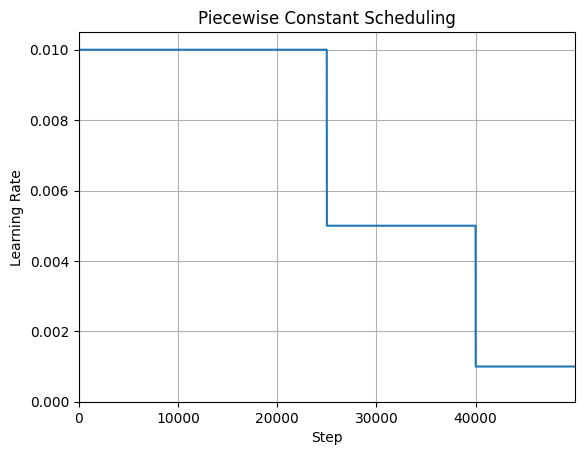

In [83]:
steps = np.arange(50_000)
lrs = np.zeros_like(steps, dtype= np.float64)

lrs[:25_000] = 0.01
lrs[25_000: 40_000] = 0.005
lrs[40_000:] = 0.001

plt.plot(steps, lrs)

plt.title('Piecewise Constant Scheduling')
plt.xlabel('Step')
plt.ylabel('Learning Rate')
plt.axis([0, steps.max(), 0, 0.0105])
plt.grid(True)
plt.show()

### Performance Scheduling

In [85]:
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate= 0.01)
model.compile(
    optimizer= optimizer,
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

In [88]:
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(factor= 0.5, patience= 5)
history = model.fit(
    X_train, y_train,
    epochs= 20,
    validation_split= 0.05,
    callbacks= [lr_schedule]
)

Epoch 1/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7398 - loss: 0.7480 - val_accuracy: 0.8360 - val_loss: 0.4450 - learning_rate: 0.0100
Epoch 2/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8565 - loss: 0.3976 - val_accuracy: 0.8513 - val_loss: 0.4074 - learning_rate: 0.0100
Epoch 3/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8743 - loss: 0.3470 - val_accuracy: 0.8557 - val_loss: 0.3886 - learning_rate: 0.0100
Epoch 4/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8841 - loss: 0.3171 - val_accuracy: 0.8650 - val_loss: 0.3773 - learning_rate: 0.0100
Epoch 5/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8919 - loss: 0.2952 - val_accuracy: 0.8677 - val_loss: 0.3714 - learning_rate: 0.0100
Epoch 6/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8979 - loss: 0.2780 - val_accuracy: 0.8703 - val_loss: 0.3698 - learning_rate: 0.0100
Epoch 7/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9026 - l

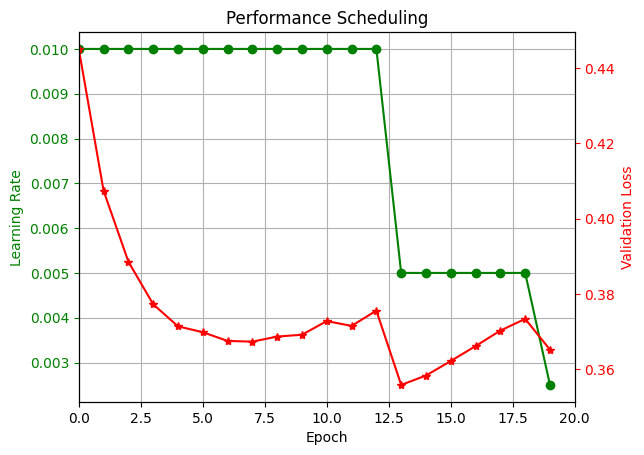

In [93]:
plt.plot(history.epoch, history.history['learning_rate'], 'go-')
plt.title('Performance Scheduling')
plt.xlabel('Epoch')
plt.xlim(0, 20)
plt.ylabel('Learning Rate', color= 'g')
plt.tick_params('y', colors='g')
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history['val_loss'], 'r*-')
ax2.set_ylabel('Validation Loss', color= 'r')
ax2.tick_params('y', colors= 'r')

plt.show()

## Regularization

### $l_{1}$ & $l_{2}$ Regularization

In [97]:
layer = tf.keras.layers.Dense(
    100,
    activation= 'relu',
    kernel_initializer= 'he_normal',
    kernel_regularizer= tf.keras.regularizers.L2(0.01)    # alpha = 0.01 
)

In [98]:
layer = tf.keras.layers.Dense(
    100,
    activation= 'relu',
    kernel_initializer= 'he_normal',
    kernel_regularizer= tf.keras.regularizers.L1L2(l1= 0.30, l2= 0.70) 
)

In [100]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [27]:
from functools import partial

RegularizedDense = partial(
    tf.keras.layers.Dense,
    activation= 'relu',
    kernel_initializer= 'he_normal',
    kernel_regularizer= tf.keras.regularizers.L2(0.01)
)

In [103]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape= [28, 28]),
    tf.keras.layers.Flatten(),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation= 'softmax')
])

model.compile(
    optimizer= 'sgd',
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

model.fit(
    X_train, 
    y_train,
    epochs= 5,
    validation_split= 0.05
)

Epoch 1/5
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7567 - loss: 7.6944 - val_accuracy: 0.8390 - val_loss: 4.5767
Epoch 2/5
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8522 - loss: 3.9660 - val_accuracy: 0.8477 - val_loss: 2.5748
Epoch 3/5
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8590 - loss: 2.2754 - val_accuracy: 0.8530 - val_loss: 1.6016
Epoch 4/5
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8603 - loss: 1.4534 - val_accuracy: 0.8533 - val_loss: 1.1252
Epoch 5/5
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8618 - loss: 1.0507 - val_accuracy: 0.8540 - val_loss: 0.8916


### Dropout

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape= [28, 28]),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dropout(rate= 0.2),
    tf.keras.layers.Dense(100, activation= 'relu', kernel_initializer= 'he_normal'),
    
    tf.keras.layers.Dropout(rate= 0.2),
    tf.keras.layers.Dense(100, activation= 'relu', kernel_initializer= 'he_normal'),

    tf.keras.layers.Dropout(rate= 0.2),
    tf.keras.layers.Dense(10, activation= 'softmax')
])

In [5]:
model.compile(
    optimizer= 'sgd',
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

In [6]:
model.fit(
    X_train,
    y_train,
    epochs= 20,
    validation_split= 0.05
)

Epoch 1/20


I0000 00:00:1734533615.160711      88 service.cc:145] XLA service 0x7b55fc006b60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734533615.160772      88 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 121/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3510 - loss: 2.0904

I0000 00:00:1734533619.141753      88 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1782/1782 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6481 - loss: 1.0362 - val_accuracy: 0.8350 - val_loss: 0.4534
Epoch 2/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7979 - loss: 0.5613 - val_accuracy: 0.8493 - val_loss: 0.4159
Epoch 3/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8146 - loss: 0.5148 - val_accuracy: 0.8507 - val_loss: 0.3955
Epoch 4/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8266 - loss: 0.4791 - val_accuracy: 0.8590 - val_loss: 0.3781
Epoch 5/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8352 - loss: 0.4538 - val_accuracy: 0.8580 - val_loss: 0.3733
Epoch 6/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8333 - loss: 0.4550 - val_accuracy: 0.8657 - val_loss: 0.3611
Epoch 7/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8455 - loss: 0.4254 - val_accuracy: 0.8687 - val_loss: 0.3559
Epoch 8/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8462 - loss: 0.4192 - val_accura

In [7]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8743 - loss: 0.3435


[0.3473779261112213, 0.8723999857902527]

### Monte Carlo (MC) Dropout

In [8]:
y_probas = np.stack([model(X_test, training= True) for _ in range(100)])
y_proba = y_probas.mean(axis= 0)

In [9]:
y_probas.shape

(100, 10000, 10)

In [13]:
model.predict(X_test[:1]).round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.03 , 0.   , 0.046, 0.   ,
        0.924]], dtype=float32)

In [14]:
y_proba[0].round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.118, 0.   , 0.109, 0.001,
       0.773], dtype=float32)

In [15]:
y_std = y_probas.std(axis= 0)
y_std[0].round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.16 , 0.   , 0.117, 0.003,
       0.213], dtype=float32)

In [17]:
y_pred = y_proba.argmax(axis= 1)
accuracy = (y_pred == y_test).sum() / len(y_test)
accuracy

0.8709

In [23]:
from tensorflow.types.experimental import TensorLike

class MCDropout(tf.keras.layers.Dropout):
    def call(self, inputs: TensorLike, training: bool | None = None) -> tf.Tensor:
        return super().call(inputs, training= True)

In [24]:
# copying the model and replacing Dropout with MCDropout
mc_model = tf.keras.Sequential([
    MCDropout(layer.rate) if isinstance(layer, tf.keras.layers.Dropout)
    else layer
    for layer in model.layers
])
# setting weights
mc_model.set_weights(model.get_weights())

In [25]:
mc_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout_3 (MCDropout)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout_4 (MCDropout)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout_5 (MCDropout)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
np.mean(
    [mc_model.predict(X_test[:1]) for _ in range(100)],
    axis= 0
).round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.127, 0.   , 0.117, 0.   ,
        0.756]], dtype=float32)

### Max Norm

In [30]:
MaxNormDense = partial(
    tf.keras.layers.Dense,
    activation= 'relu',
    kernel_initializer= 'he_normal',
    kernel_constraint= tf.keras.constraints.MaxNorm()
)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape= [28, 28]),
    tf.keras.layers.Flatten(),
    MaxNormDense(100),
    MaxNormDense(100),
    MaxNormDense(100),
    tf.keras.layers.Dense(10, activation= 'softmax')
])

model.compile(
    optimizer= tf.keras.optimizers.SGD(learning_rate= 0.01, momentum= 0.9),
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs= 10,
    validation_split= 0.05
)

Epoch 1/10
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7939 - loss: 0.5893 - val_accuracy: 0.8727 - val_loss: 0.3668
Epoch 2/10
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8759 - loss: 0.3425 - val_accuracy: 0.8653 - val_loss: 0.3484
Epoch 3/10
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8887 - loss: 0.2968 - val_accuracy: 0.8780 - val_loss: 0.3300
Epoch 4/10
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8954 - loss: 0.2753 - val_accuracy: 0.8873 - val_loss: 0.3111
Epoch 5/10
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9062 - loss: 0.2548 - val_accuracy: 0.8847 - val_loss: 0.3378
Epoch 6/10
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9100 - loss: 0.2383 - val_accuracy: 0.8787 - val_loss: 0.3412
Epoch 7/10
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9135 - loss: 0.2286 - val_accuracy: 0.8843 - val_loss: 0.3421
Epoch 8/10
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9160 - loss: 0.2211 - 